In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [23]:
#loading and preprocessing data
df = pd.read_csv('/content/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


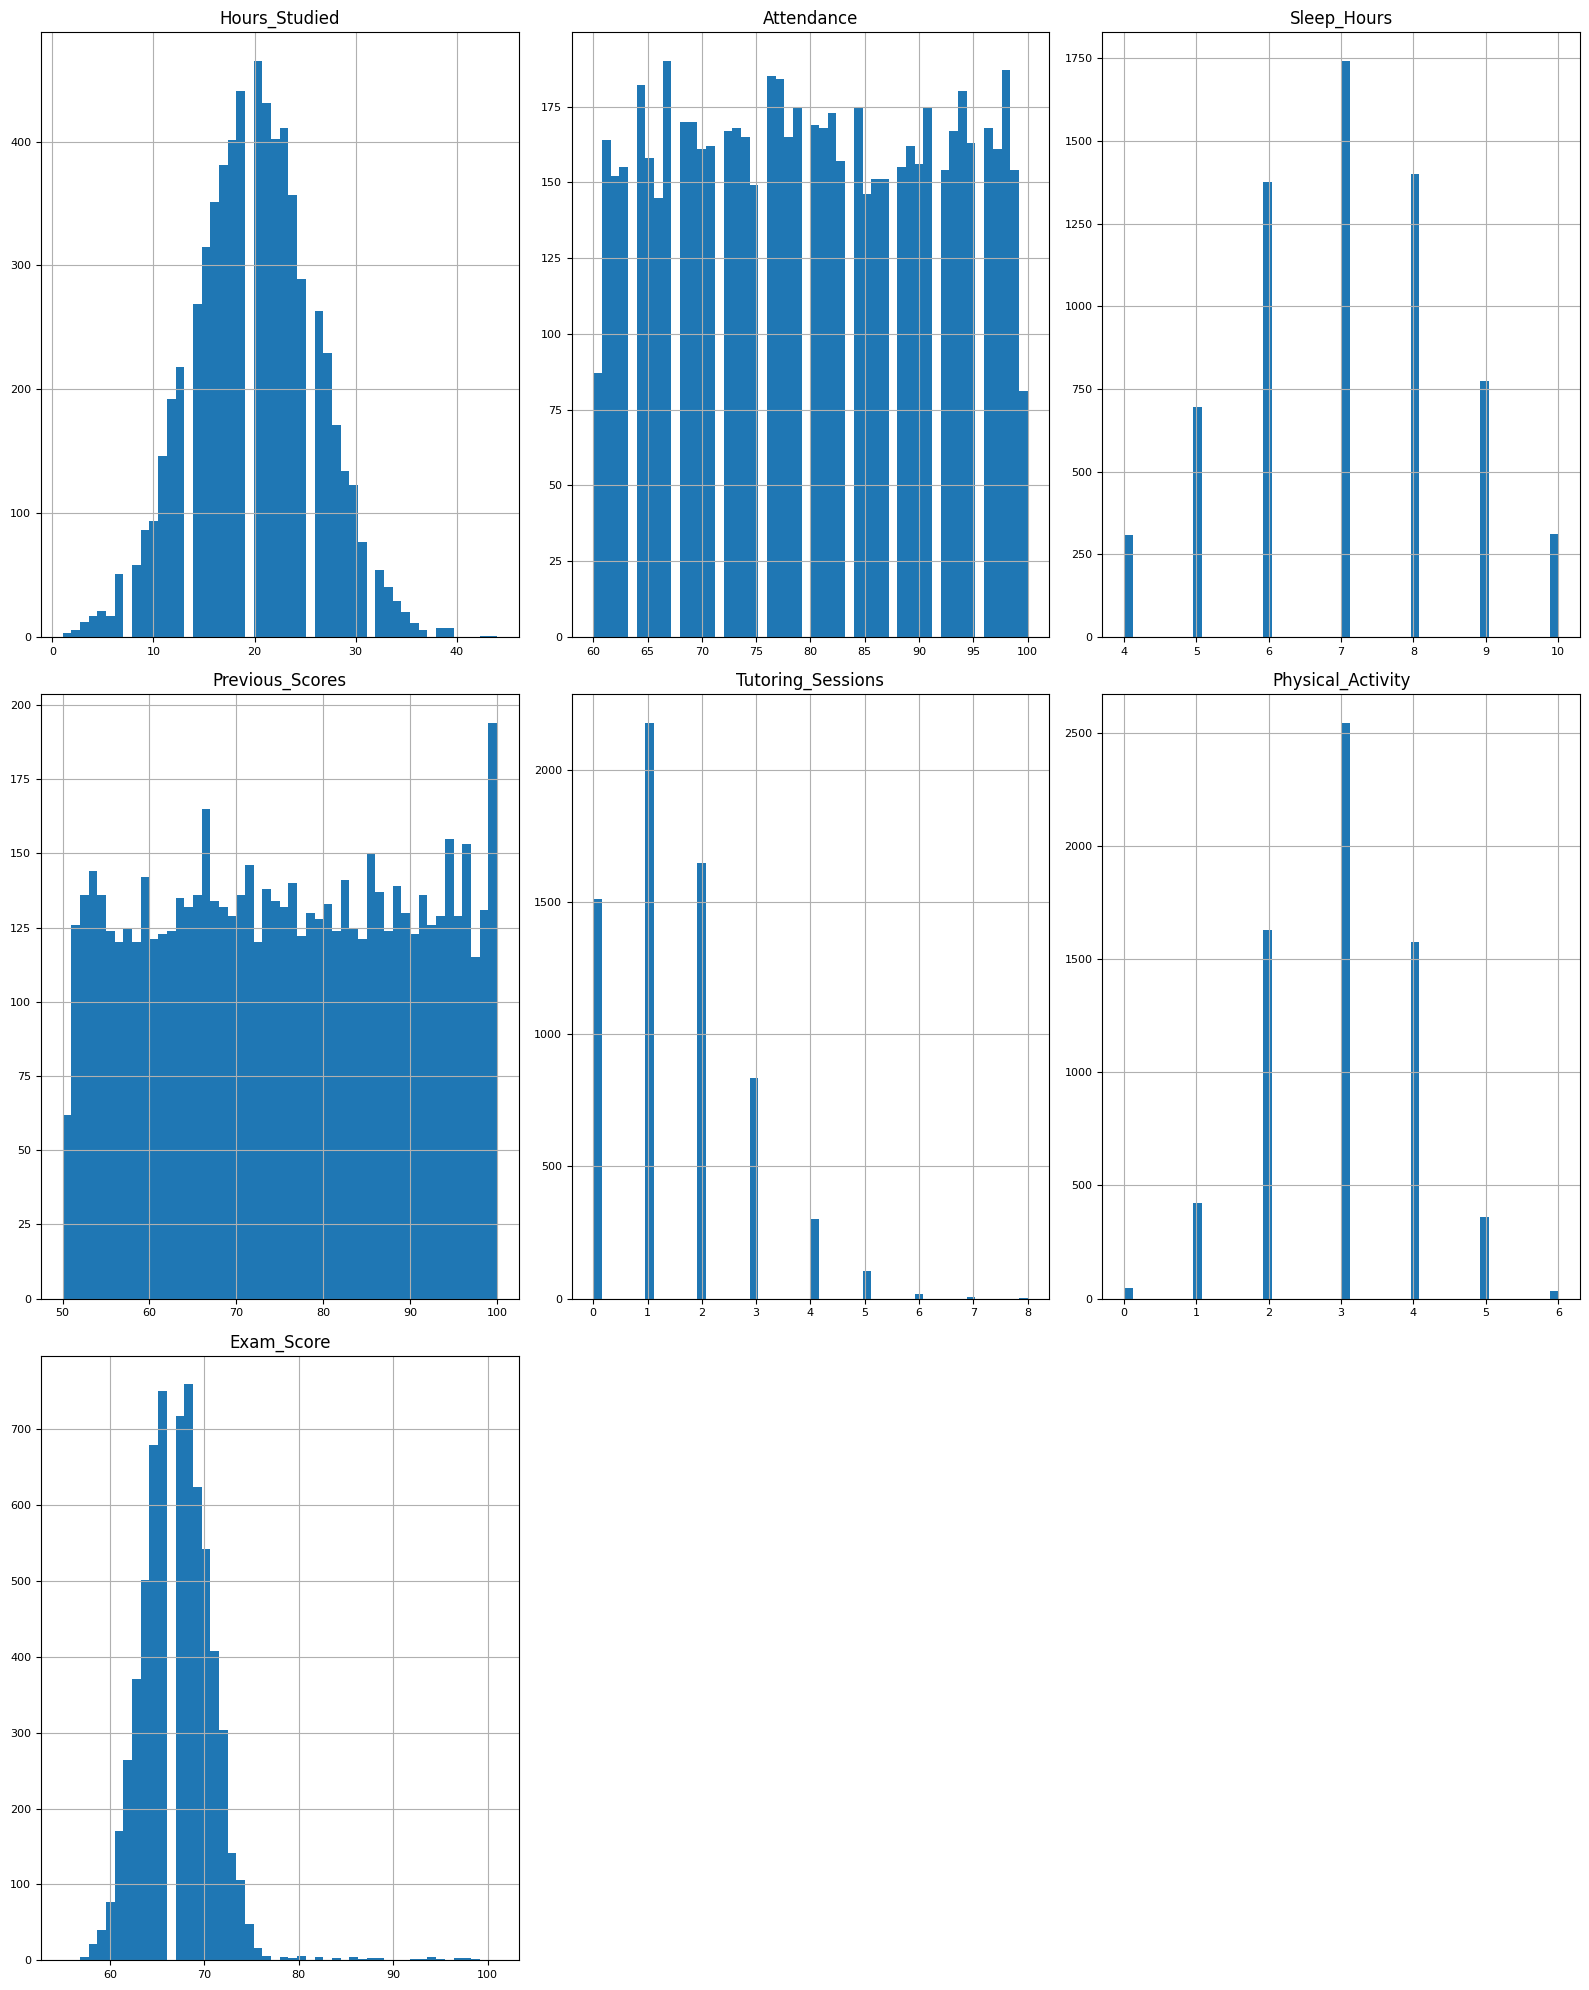

In [6]:
df.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

In [24]:
#splitting data
x=df['Hours_Studied']
y=df['Exam_Score']

In [8]:
x.shape

(6607,)

In [9]:
y.shape

(6607,)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5285,)
(1322,)
(5285,)
(1322,)


In [26]:
x_train=x_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)

In [13]:
#create and fit model
model=LinearRegression()

In [14]:
model.fit(x_train, y_train)

LinearRegression()

In [15]:
model.score(x_train, y_train)

0.19054132802448864

In [16]:
model.score(x_test, y_test)

0.2319868674542106

In [17]:
#prediction
y_pred=model.predict(x_test)

In [18]:
print(y_pred)
print(y_test)

[67.22454236 67.79587985 67.5102111  ... 68.08154859 67.5102111
 68.08154859]
743     65
5551    65
3442    71
6571    64
4204    66
        ..
4709    69
3664    72
5231    66
1773    63
5782    72
Name: Exam_Score, Length: 1322, dtype: int64


In [19]:
print(model.coef_)
print(model.intercept_)

[0.28566874]
61.51116746904424


In [20]:
#evaluation
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

10.85592128879332
0.2319868674542106
2.4475687452945643
0.03612504336839721


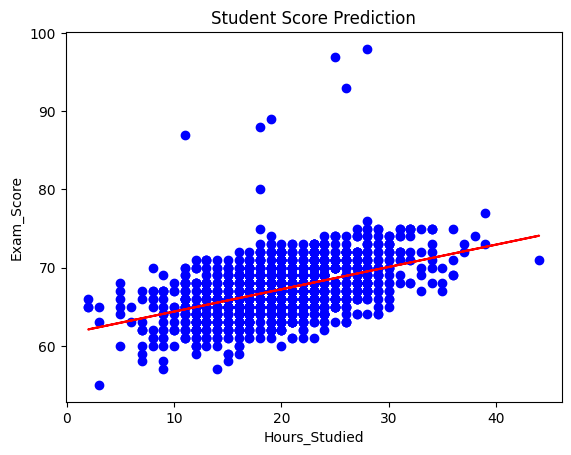

In [21]:
#visualization
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Student Score Prediction')
plt.show()

In [39]:
#Bonus
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x_train)
pmodel=np.poly1d(np.polyfit(x_train.ravel(), y_train, 4))

In [40]:
y_pred=pmodel(x_test)

In [36]:
print(y_pred)
print(y_test)

[[67.21665456]
 [67.78908933]
 [67.50383194]
 ...
 [68.07267604]
 [67.50383194]
 [68.07267604]]
743     65
5551    65
3442    71
6571    64
4204    66
        ..
4709    69
3664    72
5231    66
1773    63
5782    72
Name: Exam_Score, Length: 1322, dtype: int64


In [42]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

10.860682815406129
0.23165000843761296
2.4454783089586924
0.036089730750505776


Text(0.5, 1.0, 'Student Score Prediction')

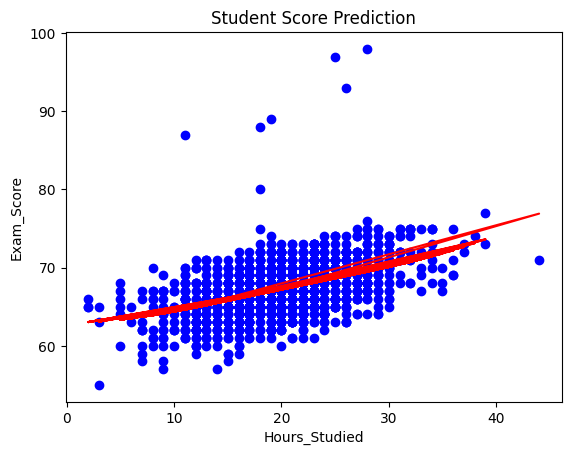

In [43]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Student Score Prediction')

In [44]:
#different features
x=df[['Hours_Studied', 'Previous_Scores','Sleep_Hours','Attendance']]
y=df['Exam_Score']

In [45]:
x.shape

(6607, 4)

In [46]:
y.shape

(6607,)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5285, 4)
(1322, 4)
(5285,)
(1322,)


In [49]:
model=LinearRegression()

In [50]:
model.fit(x_train, y_train)

LinearRegression()

In [51]:
model.score(x_train, y_train)

0.5884308756504552

In [52]:
model.score(x_test, y_test)

0.5162710419182901

In [53]:
y_pred=model.predict(x_test)

In [54]:
print(y_pred)
print(y_test)

[66.10444735 65.10581163 70.21319666 ... 69.56198077 63.28539937
 65.32697722]
4687    68
80      65
527     68
5432    74
1893    73
        ..
4950    69
2229    67
6209    69
390     61
1188    68
Name: Exam_Score, Length: 1322, dtype: int64


In [55]:
print(model.coef_)
print(model.intercept_)

[ 0.28757948  0.04831206 -0.02296646  0.19881223]
42.12293392302442


In [56]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

8.231199778016418
0.5162710419182901
1.4906377537109274
0.021433860163395647


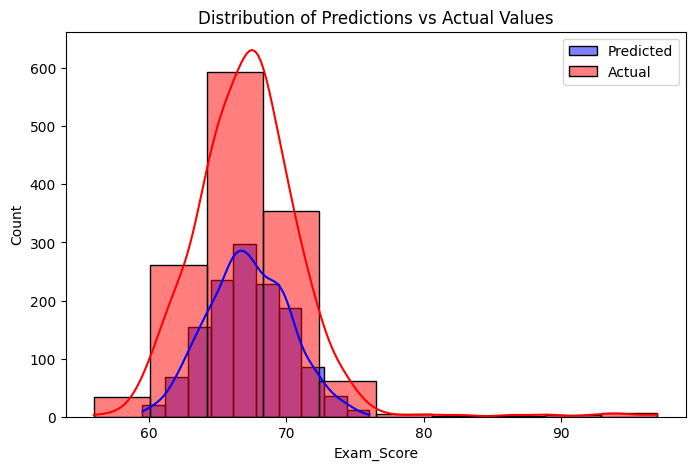

In [57]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)
plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.show()